In [ ]:
import numpy as np
import pandas as pd
!pip install eto
from eto import ETo,datasets
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

In [7]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
final_data= drive.CreateFile({'id': '1MmTTODOQVsNw9F5ljMMmHcu8xElnkpxO'});
final_data.GetContentFile('final_data.csv');

Calculation of the refference Et0 values to serve as the labels in our training data
Features as sample data and Output acts as the refference ET0 value

In [8]:
Final_data = pd.read_csv('final_data.csv', parse_dates=True, infer_datetime_format=True, index_col='date')
ET1=ETo()
ET1.param_est(Final_data,freq='D',z_msl=257,lat=30.3398,z_u=2.0)
ET1.ts_param.head()
Features=ET1.ts_param
Features=Features[['T_max','T_min','U_z','RH_min','RH_max','R_n','n_sun']]
Features['RH']=(Features['RH_min']+Features['RH_max'])/2
Features=Features.drop(['RH_min','RH_max'],axis=1)
print(Features.isnull().sum())
ETO=ET1.eto_fao()
Output=pd.DataFrame(ETO)
Output=Output.interpolate(method='linear',limit=64)
print(Output.isnull().sum())

T_max    0
T_min    0
U_z      0
R_n      0
n_sun    0
RH       0
dtype: int64
ETo_FAO_mm    0
dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [11]:
Features['T_max'] = Features['T_max'].astype(float)
Output = Output.astype(float)
op=Output['ETo_FAO_mm']
col1=Features['T_max']
corr1,_=spearmanr(col1,op) 
print('Correlation between Output and Max temp ',corr1)
col1=Features['T_min']
corr1,_=spearmanr(col1,op) 
print('Correlation between Output and Min temp ',corr1)
col1=Features['U_z']
corr1,_=spearmanr(col1,op)  
print('Correlation between Output and wind speed ',corr1)
col1=Features['R_n']
corr1,_=spearmanr(col1,op) 
print('Correlation between Output and Radiations ',corr1)  #Maximum Correlation
col1=Features['n_sun']
corr1,_=spearmanr(col1,op) 
print('Correlation between Output and sunshine hours ',corr1)
col1=Features['RH']
corr1,_=spearmanr(col1,op)  
print('Correlation between Output and Humidity ',corr1)

Correlation between Output and Max temp  0.8208719960765867
Correlation between Output and Min temp  0.6528050753021766
Correlation between Output and wind speed  0.3167322111634913
Correlation between Output and Radiations  0.9108994704233339
Correlation between Output and sunshine hours  0.5297834724963952
Correlation between Output and Humidity  -0.7546190243144665


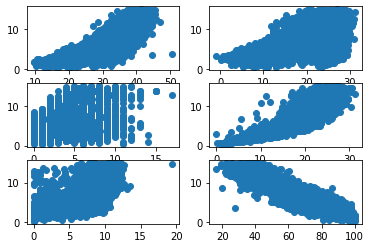

In [13]:
plt.subplot(3, 2, 1)
plt.scatter(Features['T_max'],Output['ETo_FAO_mm'])
plt.subplot(3, 2, 2)
plt.scatter(Features['T_min'],Output['ETo_FAO_mm'])
plt.subplot(3, 2, 3)
plt.scatter(Features['U_z'],Output['ETo_FAO_mm'])
plt.subplot(3, 2, 4)
plt.scatter(Features['R_n'],Output['ETo_FAO_mm'])
plt.subplot(3, 2, 5)
plt.scatter(Features['n_sun'],Output['ETo_FAO_mm'])
plt.subplot(3, 2, 6)
plt.scatter(Features['RH'],Output['ETo_FAO_mm'])

In [15]:
Features.to_csv("/content/drive/MyDrive/PROJECTS/ProfProj/Features.csv")
Output.to_csv("/content/drive/MyDrive/PROJECTS/ProfProj/Output.csv")